In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate synthetic data: A linear model


In [2]:
np.random.seed(42)  # For reproducibility

# Number of samples
n = 100

# Explanatory variable or features or covariates
# Uniformly drawn from [0, 1]
X = np.random.rand(n)

# Uniformly drawn from [-1, 2]
X = np.random.uniform(-1, 2, n)

In [3]:
# Define the data-generating function
# Linear function, with parameters a and b
# Gaussian noise with standard deviation sigma
def true_function(a,b,X,sigma=1):
    # Target variable with Gaussian noise
    y = a * X + b + np.random.randn(len(X)) * sigma
    return y


In [4]:
# Generate the target variable
# With some true parameters
a=4
b=3

# Generate the target variable
y = true_function(a,b,X,sigma=1.0)

### MLE solution

In [5]:
# Compute the best fit line using the normal equation
X_b = np.c_[np.ones((n)), X]  # Add x0 = 1 to each instance

# Compute the best fit line using the MLE solution
#   beta_best = (X^T X)^-1 X^T y
#   where X is the design matrix
#   X^T is the transpose of X
#   y is the target variable
#   beta_best are the parameters that minimize the sum of squared errors
beta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

### Compute the estimation errors, using MSE

In [6]:
# In prediction,
y_pred = X_b.dot(beta_best)
y_mse = np.mean((y_pred - y)**2)
print("MSE in prediction: ", y_mse)

# In parameter estimation, MSE
a_est = beta_best[1]
b_est = beta_best[0]
a_mse = np.mean((a_est - a)**2)
b_mse = np.mean((b_est - b)**2)
print("MSE in estimating a: ", a_mse)
print("MSE in estimating b: ", b_mse)

MSE in prediction:  0.9558913026564262
MSE in estimating a:  0.059392109072178
MSE in estimating b:  0.00014966616446277945


### Make predictions in the x \in [-1, 2] range

In [7]:
X_new = np.array([[-1], [2]])
X_new_b = np.c_[np.ones((2)), X_new]  # Add x0 = 1 to each instance
y_predict = X_new_b.dot(beta_best)

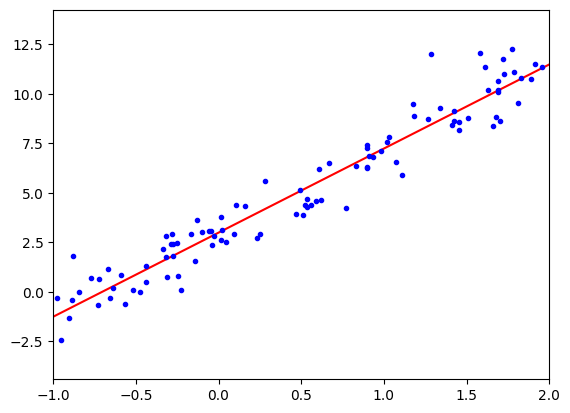

In [8]:
# Plot the data and the best fit line
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([-1, 2, min(y)-2, max(y)+2])
plt.show()

## Now, replicate the above analysis:

- Removing a single data point from an existing dataset at each experiment

- Compute the best fit line for each experiment

- plot the best fit lines on the same plot

In [9]:
# Number of samples for this experiment
n_samples = 25

X = np.random.rand(n_samples)  # Feature (independent variable)
y = true_function(a, b, X, sigma=1.0)

# Number of experiments
n_exp = 10

# Initialize arrays to store the learned parameters
beta_best = np.zeros((2, n_exp))

# Initialize arrays to store the errors
y_mse = np.zeros(n_exp)
a_mse = np.zeros(n_exp)
b_mse = np.zeros(n_exp)

# Iterate over the number of experiments
for i in range(n_exp):
    # Select a random data point to ignore
    idx = np.random.randint(0, n_samples)

    # Remove the selected data point
    X_new = np.delete(X, idx)
    y_new = np.delete(y, idx)

    # Compute the best fit line using the normal equation
    X_new_b = np.c_[np.ones((n_samples-1)), X_new]  # Add x0 = 1 to each instance
    beta_best[..., i] = np.linalg.inv(X_new_b.T.dot(X_new_b)).dot(X_new_b.T).dot(y_new)

    # Compute the errors
    y_pred = X_new_b.dot(beta_best[..., i])
    y_mse[i] = np.mean((y_pred - y_new)**2)
    a_mse[i] = np.mean((beta_best[1, i] - a)**2)
    b_mse[i] = np.mean((beta_best[0, i] - b)**2)



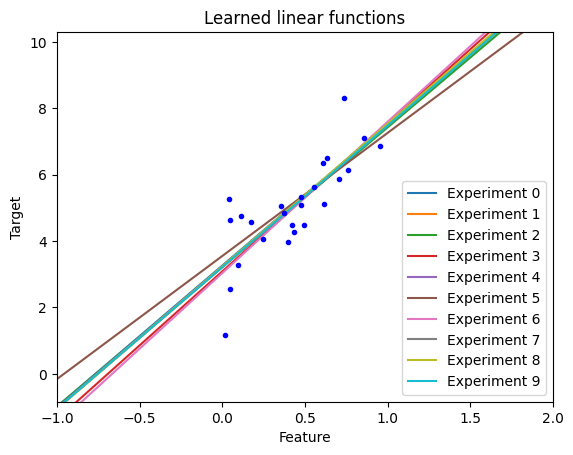

In [10]:
# Plot the learned linear functions
X_new = np.array([[-1], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add x0 = 1 to each

# Plot the learned linear functions
for i in range(n_exp):
    y_predict = X_new_b.dot(beta_best[..., i])
    plt.plot(X_new, y_predict, label='Experiment {}'.format(i))

plt.plot(X, y, "b.")
plt.axis([-1, 2, min(y)-2, max(y)+2])
# Show the legend in the lower right corner
plt.legend(loc="lower right")
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Learned linear functions')
plt.show()

## Replicate the above code for a range of samples

In [11]:
# Number of samples
n_samples= np.arange(10, 101, 10)
n_samples= np.arange(100, 10001, 100)

# Initialize arrays to store 
# the learned parameters
beta_best = np.zeros((2,len(n_samples)))
# the errors, in MSE
y_mse = np.zeros(len(n_samples))
a_mse = np.zeros(len(n_samples))
b_mse = np.zeros(len(n_samples))

# Iterate over the number of samples
for i,n_sample in enumerate(n_samples):
    # Generate random features
    X = np.random.rand(n_sample)  # Feature (independent variable)
    X = np.random.uniform(-1, 2, n_sample)
    # Generate the target variable
    y = true_function(a,b,X,sigma=1.0)
    X_b = np.c_[np.ones((n_sample)), X]  # Add x0 = 1 to each instance
    beta_best[...,i] = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    # Compute the errors
    y_pred = X_b.dot(beta_best[...,i])
    y_mse[i] = np.mean((y_pred - y)**2)
    a_mse[i] = np.mean((beta_best[1,i] - a)**2)
    b_mse[i] = np.mean((beta_best[0,i] - b)**2)

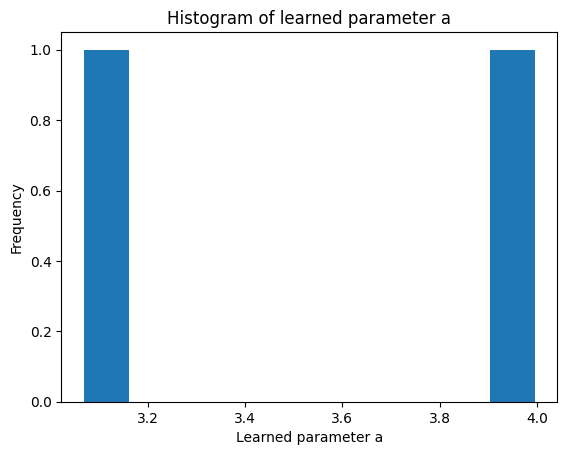

In [12]:
# Plot a histogram of the learned parameters a
plt.hist(beta_best[:,1], bins=10)
plt.xlabel('Learned parameter a')
plt.ylabel('Frequency')
plt.title('Histogram of learned parameter a')
plt.show()


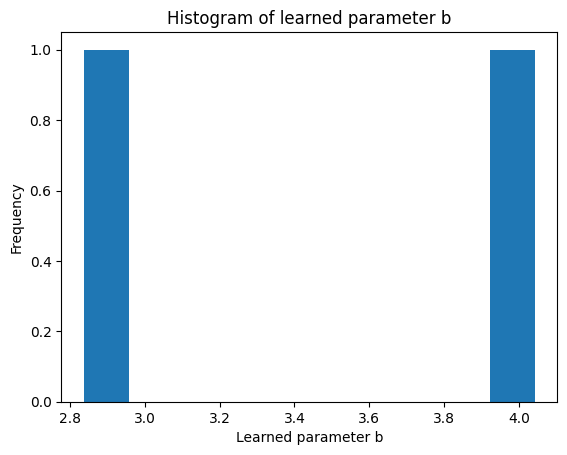

In [13]:
# Plot histogram of learned parameters b
plt.hist(beta_best[:,0], bins=10)
plt.xlabel('Learned parameter b')
plt.ylabel('Frequency')
plt.title('Histogram of learned parameter b')
plt.show()

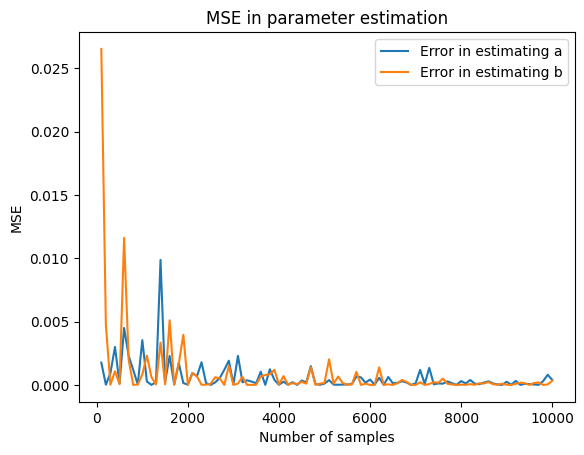

In [14]:
# Plot the error in parameter estimation, as a function of the number of samples
plt.plot(n_samples, a_mse, label='Error in estimating a')
plt.plot(n_samples, b_mse, label='Error in estimating b')
plt.xlabel('Number of samples')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE in parameter estimation')
plt.show()

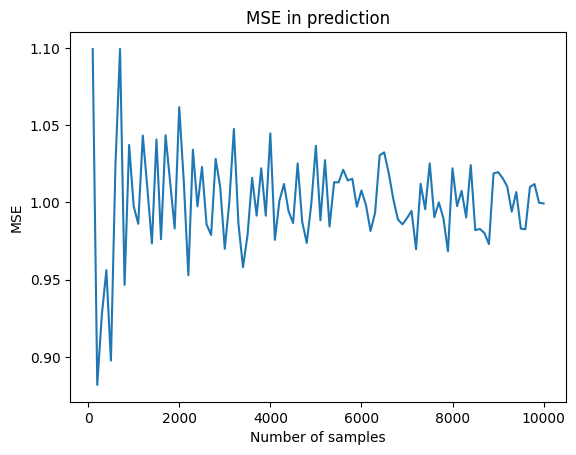

In [15]:
# Plot the error in prediction, as a function of the number of samples
plt.plot(n_samples, y_mse)
plt.xlabel('Number of samples')
plt.ylabel('MSE')
plt.title('MSE in prediction')
plt.show()

### In the above plot, what value is the MSE hovering around?

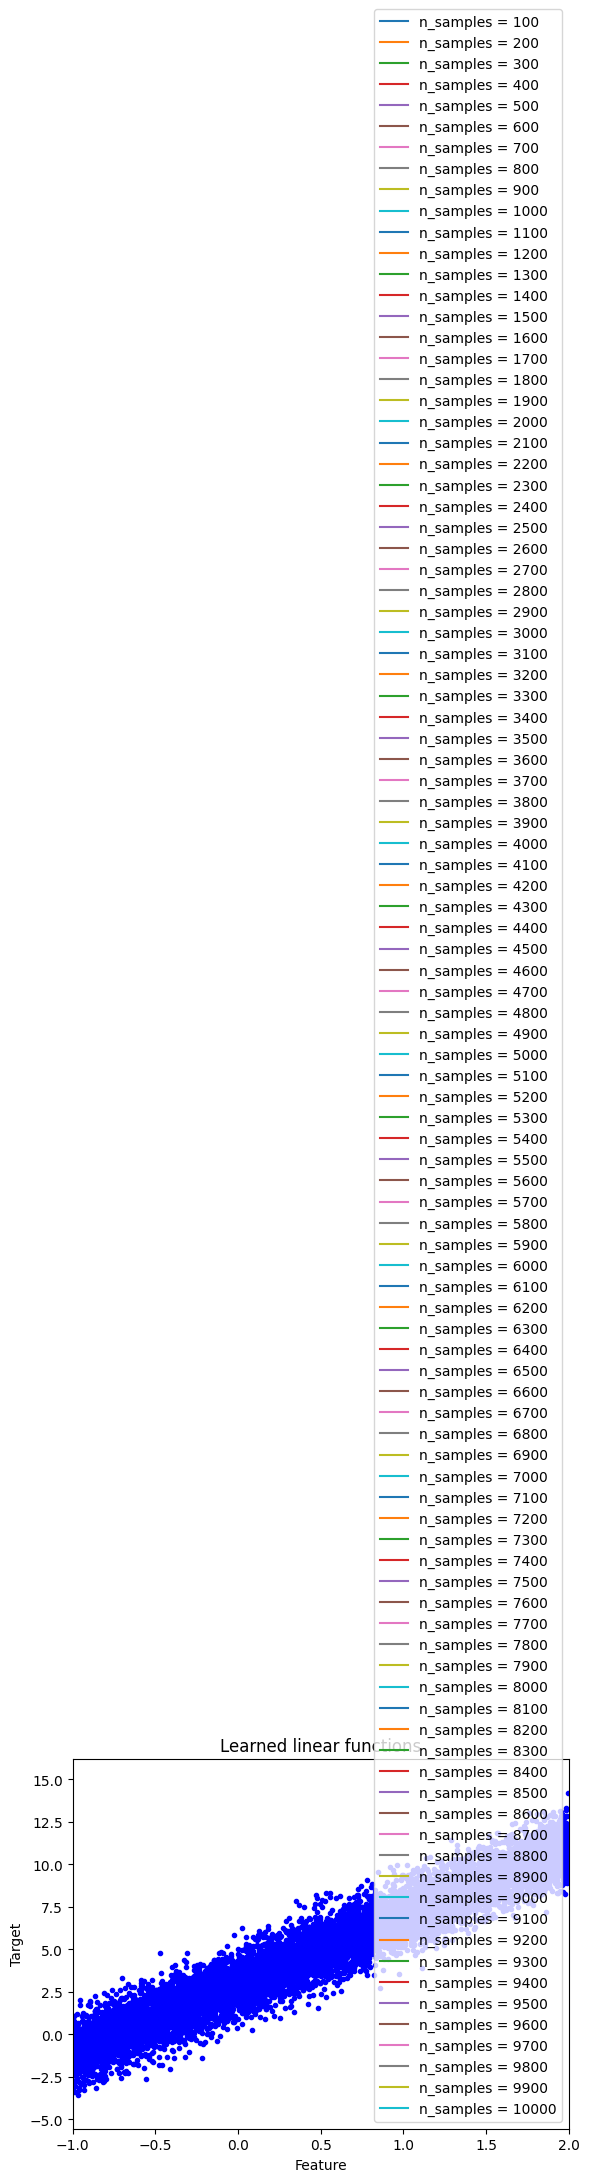

In [16]:
# Plot the learned linear functions, for a range of number of samples
X_new = np.array([[-1], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # Add x0 = 1 to each instance

# Plot the learned linear functions
for i in range(len(n_samples)):
    y_predict = X_new_b.dot(beta_best[...,i])
    plt.plot(X_new, y_predict, label='n_samples = {}'.format(n_samples[i]))
plt.plot(X, y, "b.")
plt.axis([-1, 2, min(y)-2, max(y)+2])
# Show the legend in the lower right corner
plt.legend(loc="lower right")
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Learned linear functions')
plt.show()

# Bayesian linear regression

## Define prior distributions for beta
-  Use Gaussian priors for simplicity:
    - $y = \beta^\top x + \epsilon$
    - $p(\beta) \sim N(\mu_0, \Sigma_0)$
        -  Prior parameters represent our initial beliefs about the beta values before seeing the data.
            - mean $\mu_0$
            - covariance matrix $\Sigma_0$ 


In [17]:
## Consider different priors for beta

# Prior mean for beta
prior_mean = np.array([0, 0])

# Prior covariance for beta: l2 regularization type prior
prior_cov = np.array([[1, 0], [0, 1]])

# Towards uninformative priors
prior_cov = np.array([[10, 0], [0, 10]])


In [18]:
# Generate some data
n = 100

# Explanatory variable or features or covariates
X = np.random.rand(n)
X = np.random.uniform(-1, 2, n)

# Define the data-generating function
a = 4
b = 3
sigma = 1.0
y = true_function(a, b, X, sigma=1.0)

# Define X_b
X_b = np.c_[np.ones((n)), X]  # Add x0 = 1 to each instance

## For a Gaussian likelihood, the posterior distribution is also Gaussian

the posterior distribution is a Gaussian distribution, with mean and covariance given by the following equations:

- posterior_cov: $\Sigma_n = (\frac{X_b^T * X_b}{\sigma^2} + \Sigma_0^{-1})^{-1}$
- posterior_mean: $\mu_n = \Sigma_n * (X_b^T * y / \sigma^2 + \Sigma_0^{-1} * \mu_0)$

where we must know observation noise sigma, which is assumed to be known and different from 1 in this case.


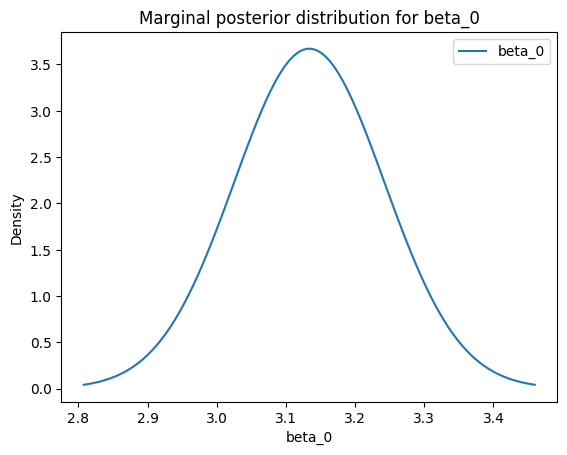

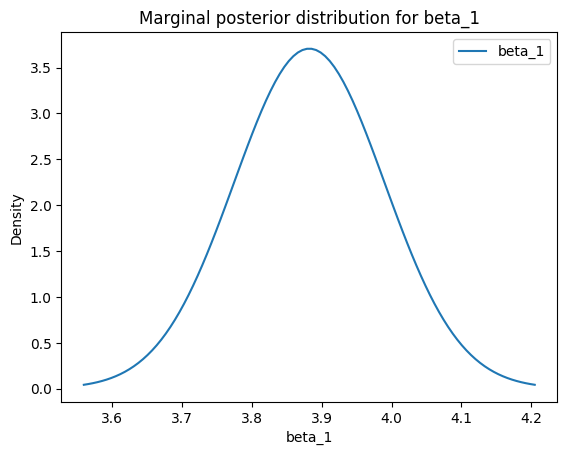

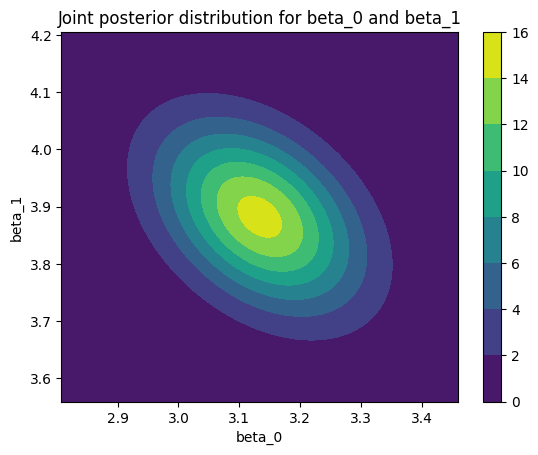

In [19]:
# Compute the posterior covariance
posterior_cov = np.linalg.inv(
    X_b.T.dot(X_b) / sigma**2 + np.linalg.inv(prior_cov)
)
# Compute the posterior mean
posterior_mean = posterior_cov.dot(
    X_b.T.dot(y) / sigma**2 + np.linalg.inv(prior_cov).dot(prior_mean)
)

# Plot the posterior distribution for beta
# Plot the marginal posterior distribution for beta_0
beta0 = np.linspace(
    posterior_mean[0] - 3 * np.sqrt(posterior_cov[0, 0]),
    posterior_mean[0] + 3 * np.sqrt(posterior_cov[0, 0]),
    100
)
f_beta0 = stats.norm.pdf(
    beta0,
    posterior_mean[0],
    np.sqrt(posterior_cov[0, 0])
)
plt.plot(beta0, f_beta0, label='beta_0')
plt.xlabel('beta_0')
plt.ylabel('Density')
plt.title('Marginal posterior distribution for beta_0')
plt.legend()
plt.show()

# Plot the marginal posterior distribution for beta_1
beta1 = np.linspace(
    posterior_mean[1] - 3 * np.sqrt(posterior_cov[1, 1]),
    posterior_mean[1] + 3 * np.sqrt(posterior_cov[1, 1]),
    100
)
f_beta1 = stats.norm.pdf(
    beta1,
    posterior_mean[1],
    np.sqrt(posterior_cov[1, 1])
)
plt.plot(beta1, f_beta1, label='beta_1')
plt.xlabel('beta_1')
plt.ylabel('Density')
plt.title('Marginal posterior distribution for beta_1')
plt.legend()
plt.show()

# Plot the posterior distribution for beta
# Plot the joint posterior distribution for beta_0 and beta_1
# Create a grid of beta_0 and beta_1 values
beta0, beta1 = np.meshgrid(
    np.linspace(
        posterior_mean[0] - 3 * np.sqrt(posterior_cov[0, 0]),
        posterior_mean[0] + 3 * np.sqrt(posterior_cov[0, 0]),
        100
    ),
    np.linspace(
        posterior_mean[1] - 3 * np.sqrt(posterior_cov[1, 1]),
        posterior_mean[1] + 3 * np.sqrt(posterior_cov[1, 1]),
        100
    )
)
# Compute the joint posterior distribution
f_beta = stats.multivariate_normal.pdf(
    np.dstack((beta0, beta1)),
    mean=posterior_mean,
    cov=posterior_cov
)
# Plot the joint posterior distribution
plt.contourf(beta0, beta1, f_beta)
plt.xlabel('beta_0')
plt.ylabel('beta_1')
plt.title('Joint posterior distribution for beta_0 and beta_1')
plt.colorbar()
plt.show()


## Compute the posterior predictive distribution

$P(y_{new} | x_{new}, X, y) = \int P(y_{new} | X_{new}, beta) P(beta | X, y) d beta$

The posterior predictive distribution is a Gaussian distribution:

$P(y_{new} | x_{new}, X, y) = \ N(y_{new} | \mu_{y_{new}}, \Sigma_{y_{new}})$

with mean and covariance given by the following equations, where we must know observation noise sigma:

- predictive_mean: $\mu_{y_{new}} = x_{new} * \mu_n$
- predictive_cov: $\Sigma_{y_{new}} = x_{new} * \Sigma_n * x_{new}^T + sigma^2 $


In [20]:
# The feature range will cover -5 to 5
X_new = np.arange(-5, 5, 0.01)
X_new_b = np.c_[np.ones(len(X_new)), X_new]  # Add x0 = 1 to each instance
                
# Compute the predictive mean
predictive_mean = X_new_b.dot(posterior_mean)
# Compute the predictive covariance
predictive_cov = X_new_b @ (posterior_cov) @ X_new_b.T + sigma**2 * np.eye(len(X_new))

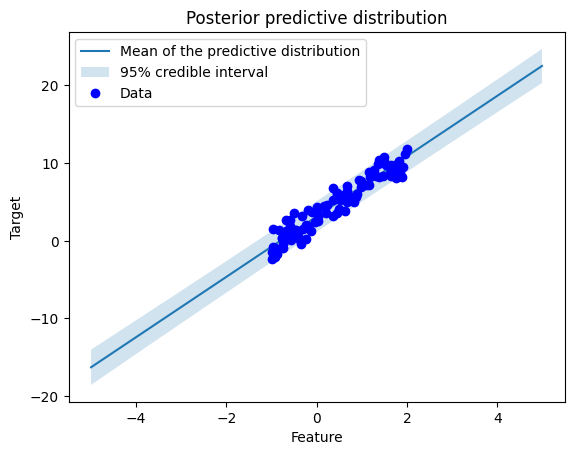

In [21]:
# Plot the posterior predictive distribution, which we know is Gaussian
# Plot the mean of the posterior predictive distribution
plt.plot(X_new, predictive_mean, label='Mean of the predictive distribution')
# Plot the 95% credible interval of the posterior predictive distribution
plt.fill_between(
    X_new,
    predictive_mean - 1.96 * np.sqrt(np.diag(predictive_cov)),
    predictive_mean + 1.96 * np.sqrt(np.diag(predictive_cov)),
    alpha=0.2,
    label='95% credible interval'
)
plt.plot(X, y, 'bo', label='Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Posterior predictive distribution')
plt.legend()
plt.show()

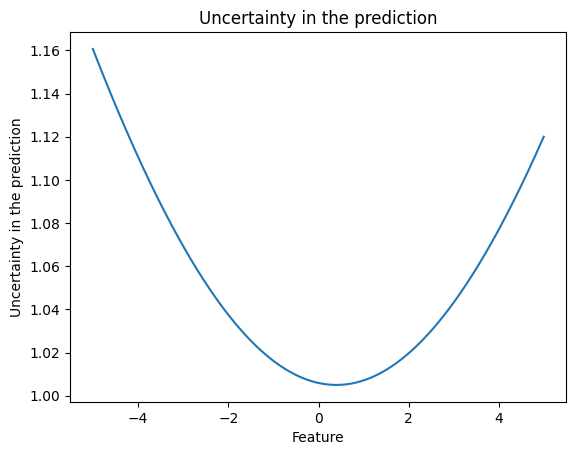

In [22]:
# Is the uncertainty in the prediction higher in regions where we have less data?
#    -  Yes, the uncertainty in the prediction is higher in regions where we have less data.
#    -  This is because the posterior predictive distribution is a Gaussian distribution,
#       and the uncertainty in the prediction is given by the variance of the predictive distribution.

# Plot the uncertainty in the prediction
plt.plot(X_new, np.sqrt(np.diag(predictive_cov)))
plt.xlabel('Feature')
plt.ylabel('Uncertainty in the prediction')
plt.title('Uncertainty in the prediction')
plt.show()

### What value is lower-bounding the uncertainty in the posterior predictive distribution?

-  The uncertainty in the posterior predictive distribution is lower-bounded by the noise level sigma.


### Compute the error in prediction

-  The error in prediction is given by the mean squared error (MSE), between the predicted target values and the true target values.


In [23]:

# Compute the predicted target values
y_pred = X_b.dot(posterior_mean)
# Compute the error in prediction
y_mse = np.mean((y_pred - y)**2)
print('MSE in prediction:', y_mse)

MSE in prediction: 1.149357620749997


In [24]:
# Replicate the above analysis for a range of number of samples
# Number of samples
n_samples = np.arange(10, 101, 10)
n_samples = np.arange(100, 10001, 100)

# Initialize arrays to store the learned parameters
beta_best = np.zeros((2, len(n_samples)))
# Initialize arrays to store the errors
y_mse = np.zeros(len(n_samples))
a_mse = np.zeros(len(n_samples))
b_mse = np.zeros(len(n_samples))

# Define prior distributions for beta
# Prior mean for beta
prior_mean = np.array([0, 0])
# Prior covariance for beta
prior_cov = np.array([[1, 0], [0, 1]])
prior_cov = np.array([[10, 0], [0, 10]])

# Iterate over the number of samples
for i, n_sample in enumerate(n_samples):
    # Generate random features
    X = np.random.rand(n_sample)  # Feature (independent variable)
    X = np.random.uniform(-1, 2, n_sample)
    # Generate the target variable
    y = true_function(a, b, X, sigma=1.0)
    X_b = np.c_[np.ones((n_sample)), X]  # Add x0 = 1 to each instance

    # Compute the posterior distribution for beta
    posterior_cov = np.linalg.inv(
        X_b.T.dot(X_b) / sigma**2 + np.linalg.inv(prior_cov)
    )
    posterior_mean = posterior_cov.dot(
        X_b.T.dot(y) / sigma**2 + np.linalg.inv(prior_cov).dot(prior_mean)
    )

    # Compute the errors
    y_pred = X_b.dot(posterior_mean)
    y_mse[i] = np.mean((y_pred - y)**2)
    a_mse[i] = np.mean((posterior_mean[1] - a)**2)
    b_mse[i] = np.mean((posterior_mean[0] - b)**2)

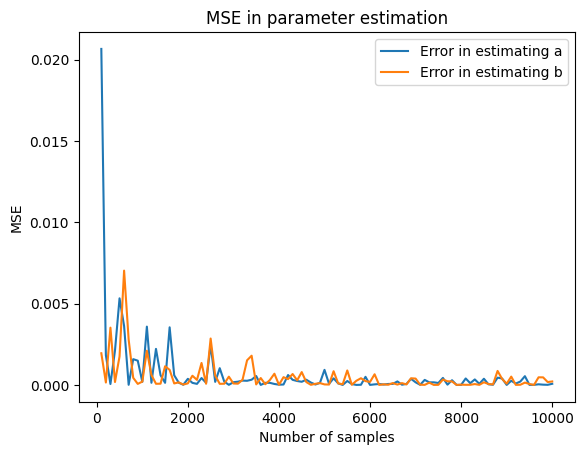

In [25]:
# Plot the error in parameter estimation, as a function of the number of samples
plt.plot(n_samples, a_mse, label='Error in estimating a')
plt.plot(n_samples, b_mse, label='Error in estimating b')
plt.xlabel('Number of samples')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE in parameter estimation')
plt.show()

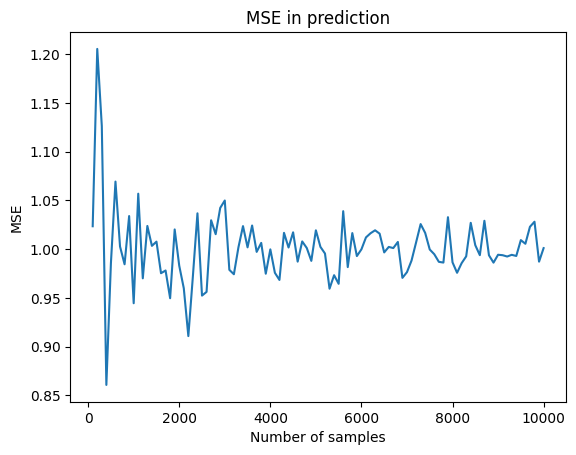

In [26]:
# Plot the prediction error, as a function of the number of samples
plt.plot(n_samples, y_mse)
plt.xlabel('Number of samples')
plt.ylabel('MSE')
plt.title('MSE in prediction')
plt.show()

### What value does the MSE in prediction converge to as the number of samples increases?

-  The MSE in prediction converges to the observation noise sigma squared as the number of samples increases.

## Do you feel brave enough to do a full Bayesian analysis? 

- Then, use a Gaussian prior for the parameters a and b, and an inverse Gamma prior for the noise variance $\sigma^2$.